In [58]:
import sqlite3 as sql
import pandas as pd
from matplotlib import pyplot as plt

In [25]:
chat = pd.read_csv("data/chat.csv",header=None,
                names=["time","devide_id","login","channel","country","player","game"])
stream = pd.read_csv("data/stream.csv")


In [26]:
display(chat.head(10))
display(stream.head(10))

,time,devide_id,login,channel,country,player,game
0,1/1/2015 18:45,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,NaN,Dota 2
1,1/1/2015 1:16,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,NaN,Devil May Cry 4: Special Edition
2,1/1/2015 16:22,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,1/1/2015 3:58,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,1/1/2015 11:47,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,NaN,Dota 2
5,1/1/2015 17:59,6fcc75522de37833a0fb21fba4965aad3b63ea57,f628d1cb946ea2e8cffc0b327bc9d77775b8d3c0,jerry,RU,NaN,Dota 2
6,1/1/2015 2:24,dea94b3030025d837dd841fbfd479e775987f65d,9dbbcf6c7792074771c4c7284807041eac467ad5,elaine,TW,NaN,Gaming Talk Shows
7,1/1/2015 18:26,671bee0f3d66077876d9bc231990597292392cc2,51c286a41daa8e060275f622f2b8436bee9fab91,jerry,UA,NaN,Dota 2
8,1/1/2015 13:13,8b31d5ebd1f4f41d4365ae4a471c1686dd256745,06decad1d9565150791e183da017f47123433a4c,estelle,GB,ipad_t,Dota 2
9,1/1/2015 20:20,f2ebb129e6930e608f2ed3f5fb52bc4d533c4891,4679f8113aa157ba76fc6db5878d7ee625e88d55,frank,CA,NaN,League of Legends


,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,NaN,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,False
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,False
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,False
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,False
5,2015-01-01 23:27:36,343fe2bfd58595d5c18602d420ecf6f9d694d5a8,7814f661a54349ff5eee84f9d6f476918c9b7270,george,US,iphone_t,DayZ,NaN,NaN
6,2015-01-01 21:09:23,80a0c7d1abb6a5a0060e18202b77bef831e08ca5,eb158cab3f606d3894a32e20bddbfd2d589095a9,frank,US,site,League of Legends,high,True
7,2015-01-01 19:14:27,1e342e5e4e228f617449029054b3bb19c5224528,2aaf6a414bc3dc923b04f986de7ba1b8101c6698,frank,CA,site,League of Legends,high,False
8,2015-01-01 13:51:04,272cffbb1a9a33ad3bb48a2ee9ae5cbcac5ca22e,401716920e3435b5e3eec9fc4ccd6a44c7af38f5,kramer,TR,site,Counter-Strike: Global Offensive,chunked,False
9,2015-01-01 22:00:14,593ed161c456eeeb9e18b8005786d42abc1a7373,ef24dc49ceb4bcd3cccb0fa862d8a150ecf935e1,frank,US,site,League of Legends,medium,False


In [27]:
# What are unique Games in Stream Table
stream.game.unique()

array(['League of Legends', 'DayZ', 'Dota 2', 'Heroes of the Storm',
       'Counter-Strike: Global Offensive',
       'Hearthstone: Heroes of Warcraft', 'The Binding of Isaac: Rebirth',
       'Agar.io', 'Gaming Talk Shows', nan, 'Rocket League',
       'World of Tanks', 'ARK: Survival Evolved', 'SpeedRunners',
       'Breaking Point', 'Duck Game', 'Devil May Cry 4: Special Edition',
       'Block N Load', 'Fallout 3', 'Batman: Arkham Knight',
       'Reign Of Kings', 'The Witcher 3: Wild Hunt',
       'The Elder Scrolls V: Skyrim', 'Super Mario Bros.', 'H1Z1',
       'The Last of Us', 'Depth', 'Mortal Kombat X',
       'Senran Kagura: Estival Versus', 'The Sims 4',
       'You Must Build A Boat', 'Choice Chamber', 'Music', 'Risk of Rain',
       'Grand Theft Auto V', 'Besiege', 'Super Mario Bros. 3', 'Hektor',
       'Bridge Constructor Medieval', 'Lucius', 'Blackjack',
       'Cities: Skylines'], dtype=object)

In [28]:
# What are unique Channels in the stream table
stream.channel.unique()

array(['frank', 'george', 'estelle', 'morty', 'kramer', 'jerry', 'helen',
       'newman', 'elaine', 'susan'], dtype=object)

In [30]:
# What are the most popular games in the stream table?

# Create a new DataFrame with just group count info:
stream.groupby(['game']).size().nlargest(10).reset_index(name="count")




,game,count
0,League of Legends,193533
1,Dota 2,85608
2,Counter-Strike: Global Offensive,54438
3,DayZ,38004
4,Heroes of the Storm,35310
5,The Binding of Isaac: Rebirth,29467
6,Gaming Talk Shows,28115
7,World of Tanks,15932
8,Hearthstone: Heroes of Warcraft,14399
9,Agar.io,11480


In [32]:
stream[stream["game"]=="League of Legends"].groupby(["country"]).size().nlargest(10).reset_index(name="count")

,country,count
0,US,85606
1,CA,13034
2,DE,10835
3,GB,6964
4,TR,4412
5,AU,3911
6,SE,3533
7,NL,3213
8,DK,2909
9,GR,2885


In [38]:
stream[stream["game"]=="League of Legends"]["country"].value_counts()

US    85606
CA    13034
DE    10835
GB     6964
TR     4412
      ...  
SN        1
AD        1
SC        1
SM        1
NC        1
Name: country, Length: 155, dtype: int64

In [39]:
# Create a list of players and number of streamers
stream["player"].value_counts()

site             246115
iphone_t         100689
android           93508
ipad_t            53646
embed             19819
xbox_one           4863
home               3479
frontpage          1567
amazon             1155
xbox360             985
roku                233
chromecast          149
facebook             83
nvidia shield         3
ouya                  3
android_pip           2
Name: player, dtype: int64

C:\Users\ranaa\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


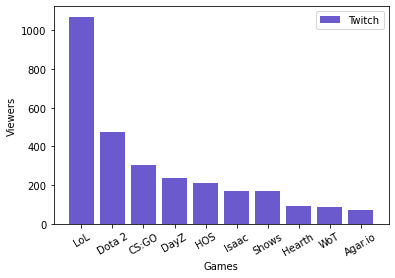

<Figure size 432x288 with 0 Axes>

In [57]:
games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]

viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

plt.bar(range(len(games)), viewers, color='slateblue')

plt.legend(["Twitch"])

plt.xlabel('Games')
plt.ylabel('Viewers')

ax = plt.subplot()

ax.set_xticks(range(0, 10))

ax.set_xticklabels(games, rotation=30)

plt.show()

# We can add plt.clf() to clear the current figure, our bar graph, before creating our next figure, the pie chart

plt.clf()

In [60]:
labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]

countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

# Lets add some color
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']

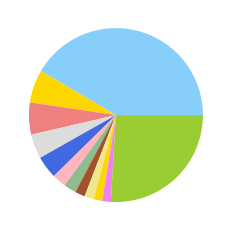

In [62]:
#Pie chart
plt.pie(countries,colors=colors)
plt.show()

Let’s make it more visually appealing and more informative.

First, let’s “explode”, or break out, the 1st slice (United States):

In [67]:
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

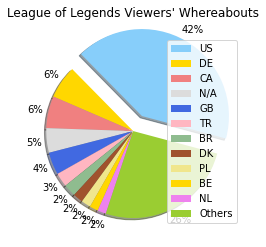

<Figure size 432x288 with 0 Axes>

In [70]:
plt.pie(countries, explode=explode, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)
plt.title("League of Legends Viewers' Whereabouts")
plt.legend(labels, loc="right")
plt.show()
plt.clf()

C:\Users\ranaa\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


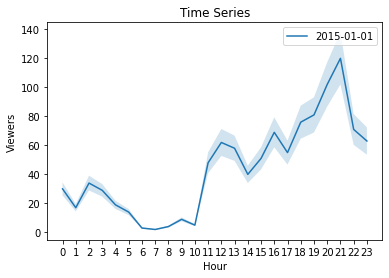

In [72]:
# Time series Analysis
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

plt.title("Time Series")

plt.xlabel("Hour")
plt.ylabel("Viewers")

plt.plot(hour, viewers_hour)

plt.legend(['2015-01-01'])

ax = plt.subplot()

ax.set_xticks(hour)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140])

y_upper = [i + (i*0.15) for i in viewers_hour]
y_lower = [i - (i*0.15) for i in viewers_hour]

plt.fill_between(hour, y_lower, y_upper, alpha=0.2)


plt.show()

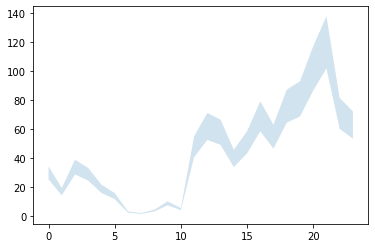

In [74]:
y_upper = [i + (i*0.15) for i in viewers_hour]
y_lower = [i - (i*0.15) for i in viewers_hour]
plt.fill_between(hour, y_lower, y_upper, alpha=0.2)

C:\Users\ranaa\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


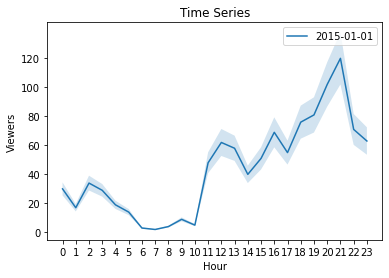

In [75]:
hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

plt.title("Time Series")

plt.xlabel("Hour")
plt.ylabel("Viewers")

plt.plot(hour, viewers_hour)

plt.legend(['2015-01-01'])

ax = plt.subplot()

ax.set_xticks(hour)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

y_upper = [i + (i*0.15) for i in viewers_hour]
y_lower = [i - (i*0.15) for i in viewers_hour]

plt.fill_between(hour, y_lower, y_upper, alpha=0.2)

plt.show()